In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
import ipdb

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])


In [3]:
X = X[permutation]
y = y[permutation].astype(np.int)
X = X.reshape((X.shape[0], -1))
print(y)

[0 4 1 ... 7 1 1]


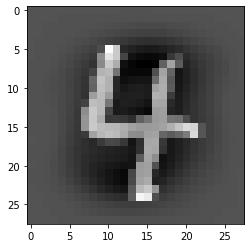

In [30]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=60000, test_size=10000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).T
X_test = scaler.transform(X_test).T

plt.gray()
plt.imshow(X_test[:, 50].reshape(28, 28))
plt.show()

In [10]:
def init_params():
    W1 = np.random.rand(64, 784) - 0.5 #randn is b/w -0.5 and 0.5
    b1 = np.random.rand(64, 1) - 0.5
    W2 = np.random.rand(10, 64) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [11]:
def ReLu(z):
    return np.maximum(0, z)
def deriv_ReLu(Z):
    return Z > 0
def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z)) #collapses into one row for the sum

In [12]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) #making a matrix of m x 10 here
    one_hot_Y[np.arange(Y.size), Y] = 1 #going through all rows and setting the column w/ index corresponding to the y to 1, its very easy to iterate over numpy arays like this apparently
    return one_hot_Y.T
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)  
    
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 /m * np.sum(dZ2, axis = 1, keepdims = True)
    
    dZ1 = W2.T.dot(dZ2) * deriv_ReLu(Z1)
    dW1 = 1 / m *dZ1.dot(X.T)
    db1 = 1/ m * np.sum(dZ1, axis = 1, keepdims = True)
    return dW1, db1, dW2, db2
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [13]:
def get_predictions(A2):
    return np.argmax(A2, 0)
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size
def grad_descent(X, Y, iterations, alpha):
    ipdb.set_trace()
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if (i%10 == 0):
            print("Iteration: ", i)
            print("Accuracy:", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [18]:
W1, b1, W2, b2 = grad_descent(X_train, y_train, 1000, 0.1)

> <ipython-input-13-5efbfe1628e5>(8)grad_descent()
      7     ipdb.set_trace()
----> 8     W1, b1, W2, b2 = init_params()
      9     for i in range(iterations):

ipdb> c
Iteration:  0
[9 8 3 ... 9 9 9] [8 9 9 ... 1 3 1]
Accuracy: 0.08541666666666667
Iteration:  10
[7 8 3 ... 1 3 1] [8 9 9 ... 1 3 1]
Accuracy: 0.5831166666666666
Iteration:  20
[7 8 3 ... 1 3 1] [8 9 9 ... 1 3 1]
Accuracy: 0.69405
Iteration:  30
[7 5 3 ... 1 3 1] [8 9 9 ... 1 3 1]
Accuracy: 0.7419833333333333
Iteration:  40
[7 5 3 ... 1 3 1] [8 9 9 ... 1 3 1]
Accuracy: 0.7691
Iteration:  50
[7 5 3 ... 1 3 1] [8 9 9 ... 1 3 1]
Accuracy: 0.7876
Iteration:  60
[7 8 3 ... 1 3 1] [8 9 9 ... 1 3 1]
Accuracy: 0.8013833333333333
Iteration:  70
[7 8 3 ... 1 3 1] [8 9 9 ... 1 3 1]
Accuracy: 0.8117333333333333
Iteration:  80
[8 8 3 ... 1 3 1] [8 9 9 ... 1 3 1]
Accuracy: 0.8202166666666667
Iteration:  90
[8 8 3 ... 1 3 1] [8 9 9 ... 1 3 1]
Accuracy: 0.8278666666666666
Iteration:  100
[8 8 3 ... 1 3 1] [8 9 9 ... 1 3 1]
Accuracy: 0

Iteration:  990
[8 9 3 ... 1 3 1] [8 9 9 ... 1 3 1]
Accuracy: 0.9199333333333334


Prediction:  [4]
Label:  4


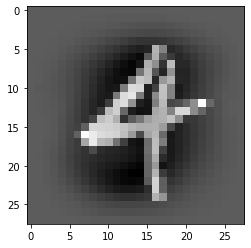

Prediction:  [2]
Label:  2


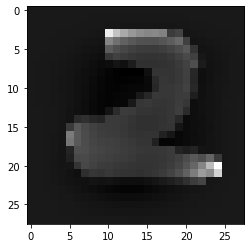

Prediction:  [1]
Label:  1


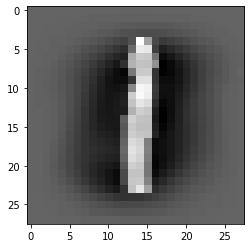

Prediction:  [1]
Label:  1


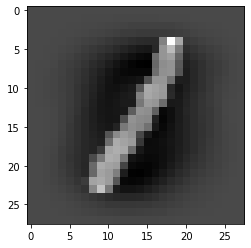

In [34]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_test[:, index, None]
    prediction = make_predictions(X_test[:, index, None], W1, b1, W2, b2)
    label = y_test[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28))
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

test_prediction(206, W1, b1, W2, b2)
test_prediction(106, W1, b1, W2, b2)
test_prediction(996, W1, b1, W2, b2)
test_prediction(2016, W1, b1, W2, b2)

In [27]:
Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_test)
print("Accuracy:", get_accuracy(get_predictions(A2), y_test))

[6 4 7 ... 6 6 3] [6 4 7 ... 6 6 5]
Accuracy: 0.9051
